# Génération de contenu musical au format MIDI avec miditoolkit

In [46]:
from miditoolkit import MidiFile, Instrument, Note
import random
import pretty_midi

import matplotlib.pyplot as plt
from collections import Counter
import os

import numpy as np

# Partie 1

### Partie 1.1

In [2]:
midi_file = MidiFile()
print("Résolution par défaut :", midi_file.ticks_per_beat)

Résolution par défaut : 480


### Partie 1.2

In [3]:
midi_file = MidiFile()

instrument = Instrument(program=0, is_drum=False, name="Single Note Track")

note = Note(velocity=80, pitch=60, start=0, end=480)
instrument.notes.append(note)

midi_file.instruments.append(instrument)

midi_file.dump("single_note.mid")
print("Fichier MIDI avec une seule note créé : single_note.mid")

Fichier MIDI avec une seule note créé : single_note.mid


### Partie 1.3

In [4]:
def create_chromatic_scale(output_file, start_pitch=60, descending=False):
    midi_file = MidiFile()
    instrument = Instrument(program=0, name="Chromatic Scale")

    pitch_range = range(start_pitch, start_pitch + 12) if not descending else range(start_pitch + 11, start_pitch - 1, -1)
    time = 0

    for pitch in pitch_range:
        note = Note(velocity=80, pitch=pitch, start=time, end=time + 480)
        instrument.notes.append(note)
        time += 480

    midi_file.instruments.append(instrument)
    midi_file.dump(output_file)
    print(f"Gamme chromatique {'descendante' if descending else 'montante'} créée : {output_file}")

create_chromatic_scale("chromatic_scale_up.mid", start_pitch=60, descending=False)
create_chromatic_scale("chromatic_scale_down.mid", start_pitch=60, descending=True)


Gamme chromatique montante créée : chromatic_scale_up.mid
Gamme chromatique descendante créée : chromatic_scale_down.mid


### Partie 1.4

In [5]:
def create_scale(output_file, scale_intervals, start_pitch=60, descending=False):
    midi_file = MidiFile()
    instrument = Instrument(program=0, name="Custom Scale")

    intervals = scale_intervals[::-1] if descending else scale_intervals
    time = 0
    pitch = start_pitch

    for interval in intervals:
        note = Note(velocity=80, pitch=pitch, start=time, end=time + 480)
        instrument.notes.append(note)
        time += 480
        pitch += -interval if descending else interval

    midi_file.instruments.append(instrument)
    midi_file.dump(output_file)
    print(f"Gamme personnalisée {'descendante' if descending else 'montante'} créée : {output_file}")

create_scale("diatonic_scale_up.mid", scale_intervals=[2, 2, 1, 2, 2, 2, 1], descending=False)
create_scale("diatonic_scale_down.mid", scale_intervals=[2, 2, 1, 2, 2, 2, 1], descending=True)

Gamme personnalisée montante créée : diatonic_scale_up.mid
Gamme personnalisée descendante créée : diatonic_scale_down.mid


### Partie 1.5

In [6]:
def random_note_sequence(output_file, scale_intervals, start_pitch=60):
    midi_file = MidiFile()
    instrument = Instrument(program=0, name="Random Notes")

    pitches = [start_pitch]
    for interval in scale_intervals:
        pitches.append(pitches[-1] + interval)

    durations = [480, 960, 1920]
    time = 0

    for _ in range(10):
        pitch = random.choice(pitches)
        duration = random.choice(durations)
        note = Note(velocity=80, pitch=pitch, start=time, end=time + duration)
        instrument.notes.append(note)
        time += duration

    midi_file.instruments.append(instrument)
    midi_file.dump(output_file)
    print(f"Séquence aléatoire créée : {output_file}")

random_note_sequence("random_notes.mid", scale_intervals=[2, 2, 1, 2, 2, 2, 1])

Séquence aléatoire créée : random_notes.mid


### Partie 1.6

In [7]:
def random_sequence_with_silence(output_file, scale_intervals, start_pitch=60):
    midi_file = MidiFile()
    instrument = Instrument(program=0, name="Random Notes with Silence")

    pitches = [start_pitch]
    for interval in scale_intervals:
        pitches.append(pitches[-1] + interval)

    durations = [480, 960, 1920]
    time = 0

    for _ in range(10):
        is_silence = random.choice([True, False])
        duration = random.choice(durations)

        if not is_silence:
            pitch = random.choice(pitches)
            note = Note(velocity=80, pitch=pitch, start=time, end=time + duration)
            instrument.notes.append(note)

        time += duration

    midi_file.instruments.append(instrument)
    midi_file.dump(output_file)
    print(f"Séquence avec silences créée : {output_file}")

random_sequence_with_silence("random_notes_with_silence.mid", scale_intervals=[2, 2, 1, 2, 2, 2, 1])

Séquence avec silences créée : random_notes_with_silence.mid


# Partie 2

### Partie 2.1

In [14]:
midi_file_path = 'Partie2/shanxi-802.mid'
midi = MidiFile(midi_file_path)

for i, track in enumerate(midi.instruments):
    print(f"Track {i}: {track.name}, {len(track.notes)} notes")

pm = pretty_midi.PrettyMIDI(midi_file_path)
audio_data = pm.synthesize(fs=44100)
with open('Partie2/output_audio.wav', 'wb') as audio_file:
    audio_file.write(audio_data)

Track 0: , 63 notes


### Partie 2.2

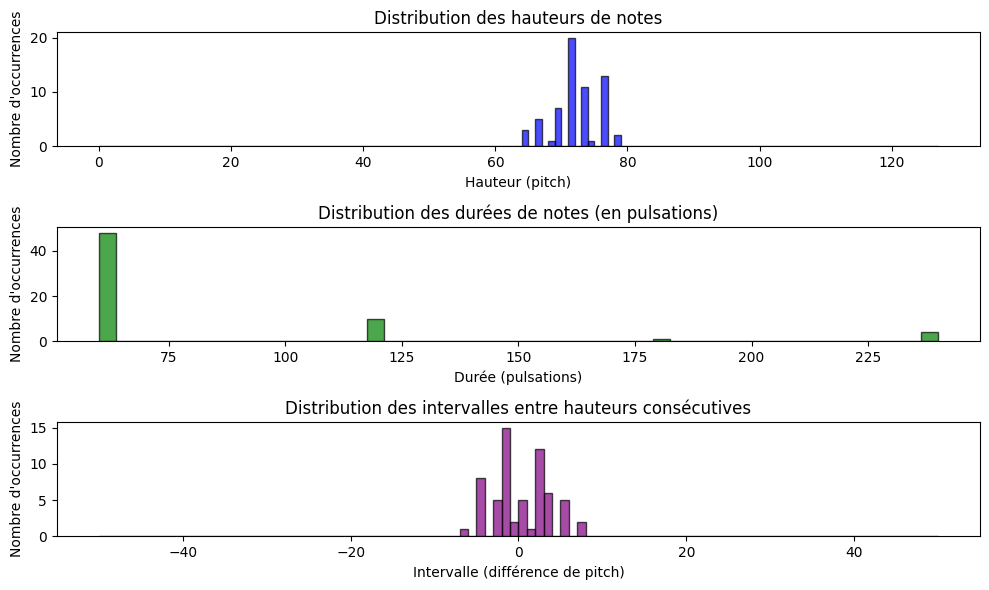

In [17]:
midi_file_path = 'Partie2/shanxi-802.mid'
midi = MidiFile(midi_file_path)

note_pitches = []
note_durations = []
note_intervals = []

for track in midi.instruments:
    if not track.is_drum:  # Ignorer les pistes de percussions
        track_notes = sorted(track.notes, key=lambda x: x.start)
        note_pitches.extend([note.pitch for note in track_notes])
        note_durations.extend([note.end - note.start for note in track_notes])
        note_intervals.extend(
            [track_notes[i + 1].pitch - track_notes[i].pitch for i in range(len(track_notes) - 1)]
        )

plt.figure(figsize=(10, 6))

# Distribution des hauteurs de notes
plt.subplot(3, 1, 1)
plt.hist(note_pitches, bins=range(0, 128), color='blue', alpha=0.7, edgecolor='black')
plt.title(r'Distribution des hauteurs de notes')
plt.xlabel(r'Hauteur (pitch)')
plt.ylabel(r"Nombre d'occurrences")

# Distribution des durées de notes
plt.subplot(3, 1, 2)
plt.hist(note_durations, bins=50, color='green', alpha=0.7, edgecolor='black')
plt.title(r'Distribution des durées de notes (en pulsations)')
plt.xlabel(r'Durée (pulsations)')
plt.ylabel(r"Nombre d'occurrences")

# Distribution des intervalles entre hauteurs consécutives
plt.subplot(3, 1, 3)
plt.hist(note_intervals, bins=range(-50, 51), color='purple', alpha=0.7, edgecolor='black')
plt.title(r'Distribution des intervalles entre hauteurs consécutives')
plt.xlabel(r'Intervalle (différence de pitch)')
plt.ylabel(r"Nombre d'occurrences")

plt.tight_layout()
plt.show()

### Partie 2.3

In [36]:
# Fonction pour obtenir une distribution à partir d'une liste de valeurs
def get_distribution(values):
    distribution = dict(Counter(values))
    sorted_distribution = dict(sorted(distribution.items()))
    return sorted_distribution

# Fonction pour échantillonner un élément en fonction d'une distribution
def sample_from_distribution(distribution):
    elements, counts = zip(*distribution.items())
    total_count = sum(counts)
    probabilities = [count / total_count for count in counts]
    return random.choices(elements, probabilities, k=1)[0]

In [37]:
example_values = "abracadabra"
distribution = get_distribution(example_values)
print("Distribution :", distribution)

sampled_value = sample_from_distribution(distribution)
print("Échantillon tiré :", sampled_value)

Distribution : {'a': 5, 'b': 2, 'c': 1, 'd': 1, 'r': 2}
Échantillon tiré : a


In [63]:
# Obtenir les distributions des hauteurs et des durées
pitch_distribution = get_distribution(note_pitches)
duration_distribution = get_distribution(note_durations)

melody = []
previous_pitch = random.choice(note_pitches)  # Commencer avec une hauteur aléatoire
current_time = 0

for _ in range(30):
    pitch = sample_from_distribution(pitch_distribution)  # Hauteur aléatoire
    duration = sample_from_distribution(duration_distribution)  # Durée aléatoire

    note = Note(
        pitch=pitch,
        start=current_time,
        end=current_time + duration,
        velocity=100
    )

    melody.append(note)
    current_time += duration  # Mettre à jour le temps de début pour la prochaine note

output_midi_path = 'Partie2/Random_Sampling_2_3.mid'
midi_out = MidiFile()
instrument = Instrument(program=0)
instrument.notes = melody
midi_out.instruments.append(instrument)

midi_out.dump(output_midi_path)
print(f"Fichier MIDI généré : {output_midi_path}")

Fichier MIDI généré : Partie2/Random_Sampling_2_3.mid


### Partie 2.4

In [64]:
# Calculer les intervalles entre les hauteurs consécutives
intervals = [note_pitches[i+1] - note_pitches[i] for i in range(len(note_pitches)-1)]
interval_distribution = get_distribution(intervals)


melody = []
previous_pitch = random.choice(note_pitches)  # Première hauteur aléatoire
current_time = 0

for _ in range(30):
    if len(melody) == 0:
        # Première note : tirée de la distribution des hauteurs
        pitch = sample_from_distribution(pitch_distribution)
    else:
        # Notes suivantes : tirées par intervalle à partir de la précédente
        interval = sample_from_distribution(interval_distribution)
        pitch = previous_pitch + interval

    duration = sample_from_distribution(duration_distribution)  # Durée aléatoire

    note = Note(
        pitch=pitch,
        start=current_time,
        end=current_time + duration,
        velocity=100
    )

    melody.append(note)
    previous_pitch = pitch  # Mettre à jour la hauteur précédente
    current_time += duration  # Mettre à jour le temps de début pour la prochaine note

output_midi_path = 'Partie2/Random_Sampling_2_4.mid'
midi_out = MidiFile()
instrument = Instrument(program=0)
instrument.notes = melody
midi_out.instruments.append(instrument)

midi_out.dump(output_midi_path)
print(f"Fichier MIDI généré : {output_midi_path}")

Fichier MIDI généré : Partie2/Random_Sampling_2_4.mid


# Partie 3

### Partie 3.1

In [65]:
# Fonction pour calculer la matrice de transition
def compute_transition_matrix(values):
    unique_values = sorted(set(values))
    matrix_size = len(unique_values)
    transition_matrix = np.zeros((matrix_size, matrix_size), dtype=int)

    value_to_index = {value: idx for idx, value in enumerate(unique_values)}
    
    # Remplir la matrice de transition
    for i in range(1, len(values)):
        current_value = values[i-1]
        next_value = values[i]
        current_idx = value_to_index[current_value]
        next_idx = value_to_index[next_value]
        transition_matrix[current_idx, next_idx] += 1
    
    return unique_values, transition_matrix

In [66]:
midi_file_path = 'Partie2/shanxi-802.mid'
midi = MidiFile(midi_file_path)

note_pitches = []
note_durations = []
note_intervals = []

for track in midi.instruments:
    if not track.is_drum:  # Ignorer les pistes de percussions
        track_notes = sorted(track.notes, key=lambda x: x.start)
        note_pitches.extend([note.pitch for note in track_notes])
        note_durations.extend([note.end - note.start for note in track_notes])
        note_intervals.extend([note_pitches[i+1] - note_pitches[i] for i in range(len(note_pitches)-1)])

height_values, height_transition_matrix = compute_transition_matrix(note_pitches)
duration_values, duration_transition_matrix = compute_transition_matrix(note_durations)
interval_values, interval_transition_matrix = compute_transition_matrix(note_intervals)

print("Matrice de transition des hauteurs :")
print(np.array2string(height_transition_matrix, separator=', '))
print("\n")

print("Matrice de transition des durées :")
print(np.array2string(duration_transition_matrix, separator=', '))
print("\n")

print("Matrice de transition des intervalles :")
print(np.array2string(interval_transition_matrix, separator=', '))

Matrice de transition des hauteurs :
[[0, 0, 0, 1, 1, 0, 0, 0, 0],
 [3, 0, 0, 2, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 4, 0, 0, 1, 0],
 [0, 4, 0, 2, 4, 6, 0, 4, 0],
 [0, 0, 0, 0, 7, 0, 0, 4, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 4, 4, 1, 1, 2],
 [0, 0, 0, 0, 0, 0, 0, 2, 0]]


Matrice de transition des durées :
[[37,  8,  0,  3],
 [ 7,  2,  0,  1],
 [ 1,  0,  0,  0],
 [ 2,  0,  1,  0]]


Matrice de transition des intervalles :
[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 2, 0, 1, 0, 3, 2, 0, 0],
 [0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0],
 [0, 2, 3, 1, 1, 0, 0, 3, 0, 3, 1],
 [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 1, 0, 6, 0, 1, 0, 0, 3, 1, 0],
 [0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 1],
 [0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]]


### Partie 3.2

In [67]:
# Fonction pour échantillonner la valeur suivante en maximisant la probabilité de transition
def sample_from_transition_matrix(transition_matrix, current_idx):
    probabilities = transition_matrix[current_idx] / transition_matrix[current_idx].sum()
    next_idx = np.argmax(probabilities)  # Choisir l'indice avec la probabilité maximale
    return next_idx

melody = []
previous_pitch = random.choice(note_pitches)  # Première hauteur aléatoire
previous_duration = random.choice(note_durations)  # Première durée aléatoire
current_time = 0

for _ in range(30):
    # Sélectionner la hauteur suivante (en maximisant la probabilité de transition)
    current_pitch_idx = height_values.index(previous_pitch)
    next_pitch_idx = sample_from_transition_matrix(height_transition_matrix, current_pitch_idx)
    pitch = height_values[next_pitch_idx]
    
    # Sélectionner la durée suivante (en maximisant la probabilité de transition)
    current_duration_idx = duration_values.index(previous_duration)
    next_duration_idx = sample_from_transition_matrix(duration_transition_matrix, current_duration_idx)
    duration = duration_values[next_duration_idx]

    note = Note(
        pitch=pitch,
        start=current_time,
        end=current_time + duration,
        velocity=100
    )

    melody.append(note)
    previous_pitch = pitch
    previous_duration = duration
    current_time += duration

output_midi_path = 'Partie3/Transition_Maximizing_Melody.mid'
midi_out = MidiFile()
instrument = Instrument(program=0)
instrument.notes = melody
midi_out.instruments.append(instrument)
midi_out.dump(output_midi_path)
print(f"Fichier MIDI généré : {output_midi_path}")

Fichier MIDI généré : Partie3/Transition_Maximizing_Melody.mid


### Partie 3.3

In [68]:
melody = []
previous_pitch = random.choice(note_pitches)  # Première hauteur aléatoire
previous_duration = random.choice(note_durations)  # Première durée aléatoire
current_time = 0

for _ in range(30):
    # Sélectionner la hauteur suivante en fonction de la matrice de transition
    current_pitch_idx = height_values.index(previous_pitch)
    next_pitch_idx = sample_from_transition_matrix(height_transition_matrix, current_pitch_idx)
    pitch = height_values[next_pitch_idx]
    
    # Sélectionner la durée suivante en fonction de la matrice de transition
    current_duration_idx = duration_values.index(previous_duration)
    next_duration_idx = sample_from_transition_matrix(duration_transition_matrix, current_duration_idx)
    duration = duration_values[next_duration_idx]

    note = Note(
        pitch=pitch,
        start=current_time,
        end=current_time + duration,
        velocity=100
    )

    melody.append(note)
    previous_pitch = pitch
    previous_duration = duration
    current_time += duration

output_midi_path = 'Partie3/Random_Transition_Melody.mid'
midi_out = MidiFile()
instrument = Instrument(program=0)
instrument.notes = melody
midi_out.instruments.append(instrument)
midi_out.dump(output_midi_path)
print(f"Fichier MIDI généré : {output_midi_path}")

Fichier MIDI généré : Partie3/Random_Transition_Melody.mid


# Partie 4

### Partie 4.1

In [69]:
# Fonction pour extraire les hauteurs, durées et intervalles de chaque fichier MIDI
def extract_midi_data(midi_file_path):
    note_pitches = []
    note_durations = []
    note_intervals = []
    
    midi = MidiFile(midi_file_path)
    for track in midi.instruments:
        if not track.is_drum:  # Ignorer les pistes de percussions
            track_notes = sorted(track.notes, key=lambda x: x.start)
            note_pitches.extend([note.pitch for note in track_notes])
            note_durations.extend([note.end - note.start for note in track_notes])
            note_intervals.extend([note_pitches[i+1] - note_pitches[i] for i in range(len(note_pitches)-1)])
    
    return note_pitches, note_durations, note_intervals

# Dossier contenant les fichiers MIDI du corpus
midi_folder = 'Partie4/china'

all_note_pitches = []
all_note_durations = []
all_note_intervals = []

# Extraire les données de chaque fichier MIDI
for midi_file_name in os.listdir(midi_folder):
    if midi_file_name.endswith('.mid'):
        midi_file_path = os.path.join(midi_folder, midi_file_name)
        note_pitches, note_durations, note_intervals = extract_midi_data(midi_file_path)
        all_note_pitches.extend(note_pitches)
        all_note_durations.extend(note_durations)
        all_note_intervals.extend(note_intervals)

# Calculer les matrices de transition pour les hauteurs, durées et intervalles
height_values, height_transition_matrix = compute_transition_matrix(all_note_pitches)
duration_values, duration_transition_matrix = compute_transition_matrix(all_note_durations)
interval_values, interval_transition_matrix = compute_transition_matrix(all_note_intervals)

print("Matrice de transition pour les hauteurs (exemple) :")
print(height_transition_matrix[:5, :5])
print("\nMatrice de transition pour les durées (exemple) :")
print(duration_transition_matrix[:5, :5])

Matrice de transition pour les hauteurs (exemple) :
[[0 1 0 0 0]
 [1 0 0 3 0]
 [0 0 0 0 0]
 [0 6 0 5 0]
 [0 0 2 0 0]]

Matrice de transition pour les durées (exemple) :
[[   14     3     2     0     0]
 [    3   266     1   263     2]
 [    0     3   323    17     4]
 [    2   116    10 25644    13]
 [    0     0     2     6   244]]


### Partie 4.2

In [71]:
# Fonction pour générer la mélodie par marche aléatoire
def generate_random_melody(transition_matrices, values_list, length=30):
    melody = []
    
    # Initialiser la première note de manière aléatoire
    current_height_idx = random.choice(range(len(values_list[0])))  # Hauteur initiale
    current_duration_idx = random.choice(range(len(values_list[1])))  # Durée initiale
    current_interval_idx = random.choice(range(len(values_list[2])))  # Intervalle initial
    
    current_pitch = values_list[0][current_height_idx]
    current_duration = values_list[1][current_duration_idx]
    current_interval = values_list[2][current_interval_idx]
    
    current_time = 0
    
    for _ in range(length):
        note = Note(
            pitch=current_pitch,
            start=current_time,
            end=current_time + current_duration,
            velocity=100
        )
        melody.append(note)
        
        # Mettre à jour la hauteur en fonction de la transition de hauteur
        current_height_idx = sample_from_transition_matrix(transition_matrices[0], current_height_idx)
        current_pitch = values_list[0][current_height_idx]
        
        # Mettre à jour la durée en fonction de la transition de durée
        current_duration_idx = sample_from_transition_matrix(transition_matrices[1], current_duration_idx)
        current_duration = values_list[1][current_duration_idx]
        
        # Mettre à jour l'intervalle en fonction de la transition d'intervalle
        current_interval_idx = sample_from_transition_matrix(transition_matrices[2], current_interval_idx)
        current_interval = values_list[2][current_interval_idx]
        
        current_pitch += current_interval
        current_time += current_duration
    
    return melody

values_list = [height_values, duration_values, interval_values]
melody = generate_random_melody(
    [height_transition_matrix, duration_transition_matrix, interval_transition_matrix],
    values_list,
    length=30
)

output_midi_path = 'Partie4/Random_Melody_from_Transitions.mid'
midi_out = MidiFile()
instrument = Instrument(program=0)
instrument.notes = melody
midi_out.instruments.append(instrument)
midi_out.dump(output_midi_path)
print(f"Fichier MIDI généré : {output_midi_path}")

Fichier MIDI généré : Partie4/Random_Melody_from_Transitions.mid


### Partie 4.3

In [80]:
# Fonction pour calculer la probabilité d'une séquence de notes
def calculate_log_prob(melody, transition_matrices, values_list):
    log_prob = 0.0

    current_height_idx = values_list[0].index(melody[0].pitch)
    current_duration_idx = values_list[1].index(melody[0].end - melody[0].start)
    prev_interval_idx = 0
    current_interval_idx = 0

    # Calculer la probabilité de la séquence par sommation des log(p(x_i|x_(i-1)))
    for i in range(1, len(melody)):
        # Transition de hauteur
        prev_height_idx = current_height_idx
        current_height_idx = values_list[0].index(melody[i].pitch)
        log_prob += -np.log(transition_matrices[0][prev_height_idx, current_height_idx] + 1e-10)  # ajout d'un petit epsilon pour éviter les divisions par 0
        
        # Transition de durée
        prev_duration_idx = current_duration_idx
        current_duration_idx = values_list[1].index(melody[i].end - melody[i].start)
        log_prob += -np.log(transition_matrices[1][prev_duration_idx, current_duration_idx] + 1e-10)

        interval = melody[i].pitch - melody[i-1].pitch
        try:
            prev_interval_idx = current_interval_idx
            current_interval_idx = values_list[2].index(interval)
        except ValueError:
            # Si l'intervalle n'est pas dans la liste, ignorer ou choisir un intervalle proche
            prev_interval_idx = current_interval_idx
            closest_interval_idx = min(range(len(values_list[2])), key=lambda x: abs(values_list[2][x] - interval))
            current_interval_idx = closest_interval_idx
        
        log_prob += -np.log(transition_matrices[2][prev_interval_idx, current_interval_idx] + 1e-10)
    
    return log_prob

# Fonction pour générer plusieurs mélodies et choisir la plus probable
def generate_best_melody(transition_matrices, values_list, num_melodies=1000, length=30):
    best_melody = None
    best_log_prob = float('inf')

    for _ in range(num_melodies):
        melody = generate_random_melody(transition_matrices, values_list, length)
        log_prob = calculate_log_prob(melody, transition_matrices, values_list)
        
        # Si la probabilité est meilleure (log probabilité plus faible), on garde la mélodie
        if log_prob < best_log_prob:
            best_log_prob = log_prob
            best_melody = melody
    
    return best_melody, best_log_prob

best_melody, best_log_prob = generate_best_melody(
    [height_transition_matrix, duration_transition_matrix, interval_transition_matrix],
    values_list,
    num_melodies=1000,
    length=30
)

output_midi_path = 'Partie4/Best_Random_Melody_from_Transitions.mid'
midi_out = MidiFile()
instrument = Instrument(program=0)
instrument.notes = best_melody
midi_out.instruments.append(instrument)
midi_out.dump(output_midi_path)
print(f"Fichier MIDI généré : {output_midi_path}")
print(f"Log-probabilité de la meilleure mélodie : {best_log_prob}")

ValueError: 102 is not in list

# Partie 5

### Partie 5.1

### Partie 5.2

# Améliorations

### Amélioration 1

### Amélioration 2

### Amélioration 3